# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score




df_demo = pd.read_csv('demo01_new.csv')
pd.set_option('display.max_columns', None)

print(df_demo.info())

y= df_demo['mau']
x = df_demo.drop('mau',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=100)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   sexo                                    16650 non-null  int64  
 2   posse_de_veiculo                        16650 non-null  int64  
 3   posse_de_imovel                         16650 non-null  int64  
 4   qtd_filhos                              16650 non-null  int64  
 5   idade                                   16650 non-null  float64
 6   tempo_emprego                           16650 non-null  float64
 7   possui_celular                          16650 non-null  int64  
 8   possui_fone_comercial                   16650 non-null  int64  
 9   possui_fone                             16650 non-null  int64  
 10  possui_email                            16650 non-null  in

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

0.9774345774345774

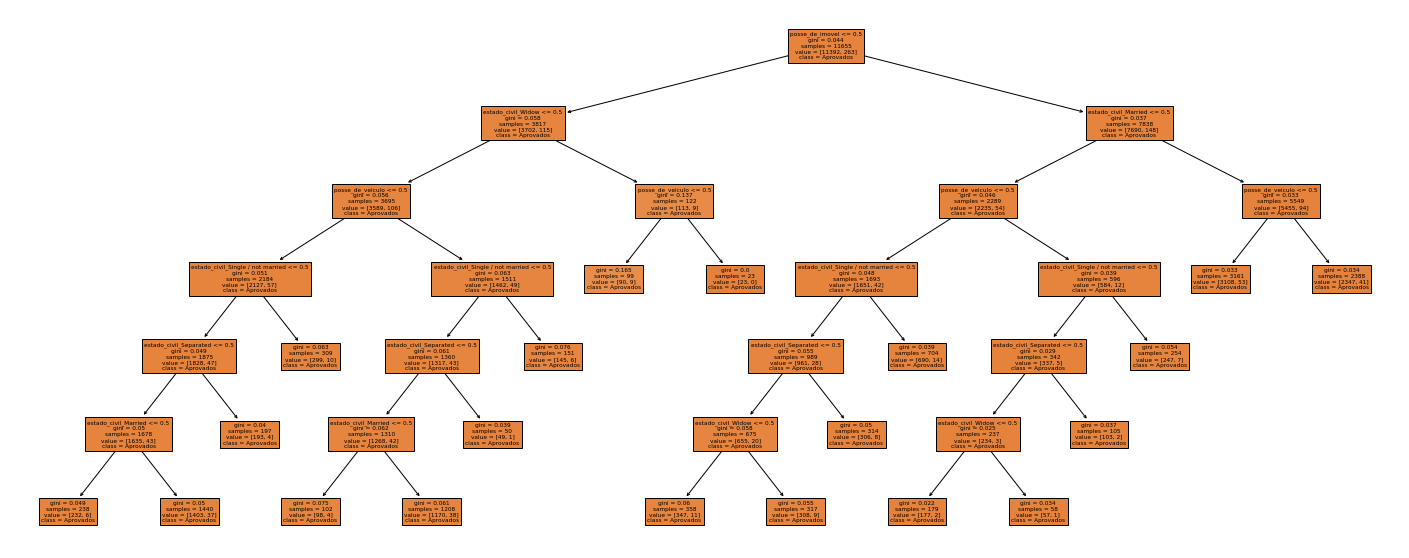

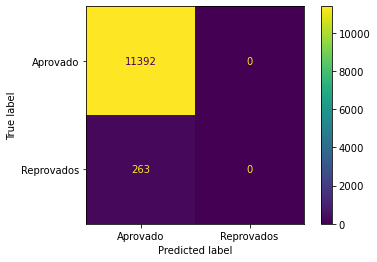

In [8]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']],y_train)

plt.figure(figsize=(25,10))
plot_tree(clf, filled=True,
               class_names = ['Aprovados','Reprovados'],
               feature_names = ['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']);

y_chapeu_train = clf.predict(x_train[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']])
plot_confusion_matrix(clf,x_train[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']],y_train, display_labels =['Aprovado','Reprovados'])
accuracy_score(y_train,y_chapeu_train)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

0.9745745745745745

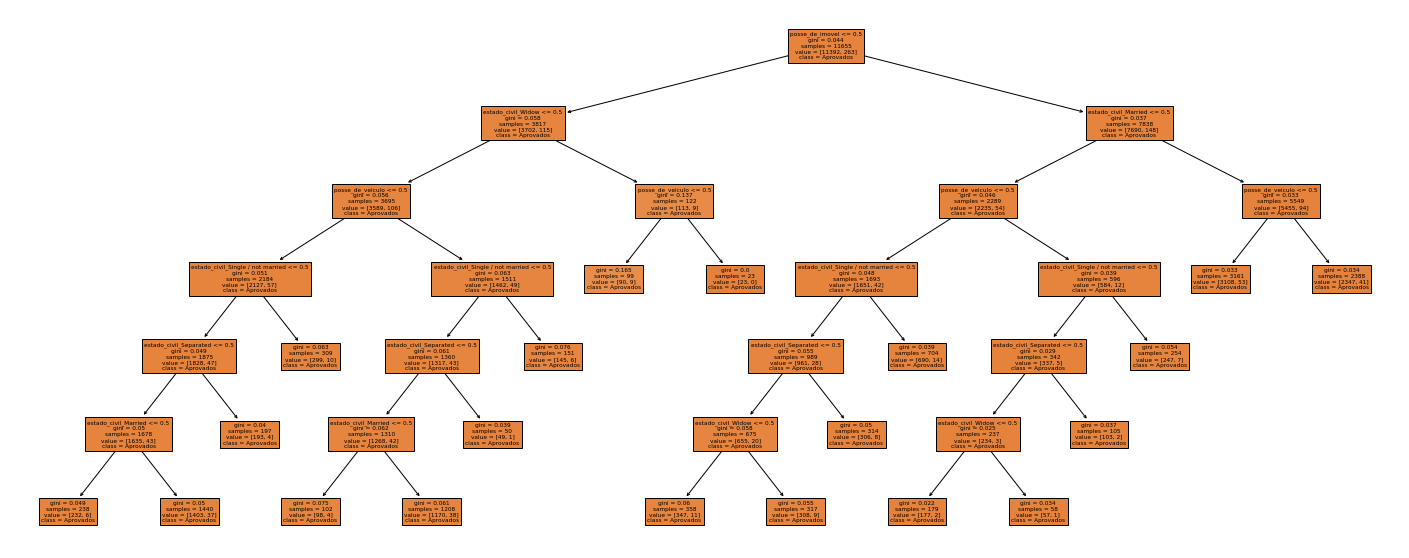

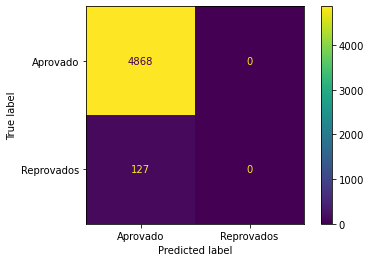

In [9]:
plt.figure(figsize=(25,10))
plot_tree(clf, filled=True,
               class_names = ['Aprovados','Reprovados'],
               feature_names = ['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']);

y_chapeu_test = clf.predict(x_test[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']])
plot_confusion_matrix(clf,x_test[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']],y_test, display_labels =['Aprovado','Reprovados'])
accuracy_score(y_test,y_chapeu_test)

A acuracia do treinamento quanto da base de teste estão bem próximas no nível de 97%. 

0.013013013013013053

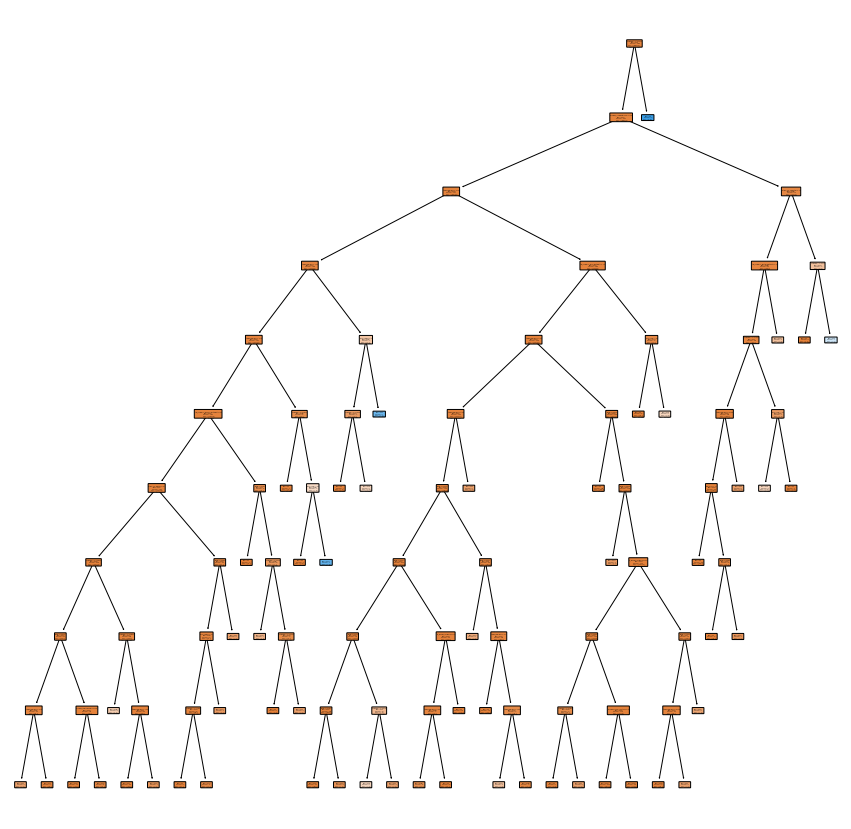

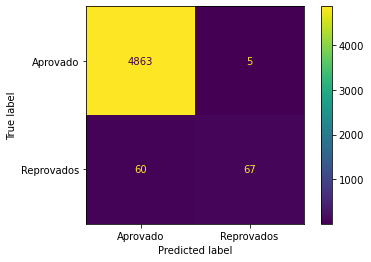

In [10]:
#Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.
# Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição 
#- qual a proporção de proponentes foram classificados como 'maus'?



clf = DecisionTreeClassifier(max_depth=10 , min_samples_leaf=5, random_state=123)
clf = clf.fit(x_test,y_test)
y_chapeu_test = clf.predict(x_test)

plt.figure(figsize=(15,15))
plot_tree(clf, filled=True,
               rounded = True,
               class_names = ['Aprovados','Reprovados'],
               feature_names = x_test.columns);
plot_confusion_matrix(clf,x_test,y_test, display_labels =['Aprovado','Reprovados'])

bom = accuracy_score(y_test,y_chapeu_test)
mau = 1-bom
mau

Proporção de proponentes que foram classificados como "mau" é de 1,30%

In [11]:
#5- Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
df_demo['mau'].value_counts()/df_demo.shape[0]


0    0.976577
1    0.023423
Name: mau, dtype: float64

Ficaria em 97,65%